# MVD 7. cvičení

## 1. část - Vytvoření dat

V dnešním cvičení je před implementací shlukování potřeba vygenerovat vlastní data. Cílem je vytvořit několik datasetů dle předlohy a vizualizovat je. Postačí dosažení podobného pozice a rozložení bodů.

In [1]:
import sys
!{sys.executable} -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import sklearn as sk
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

### 1. dataset - 2 třídy, 100 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset1.png)

Připravený dataset pro další úlohu (k-means) může vypadat například takto:
![prepared](expected_outputs/prepared_dataset.png)

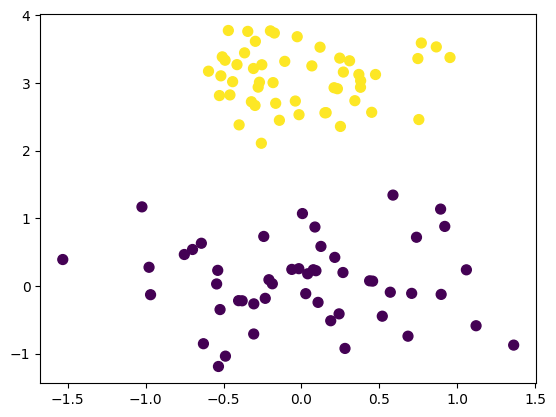

In [3]:
centers = [(0,0),(0,3)]
X1, y1 = sklearn.datasets.make_blobs(
    n_samples=100, 
    centers=centers, 
    n_features=2, 
    cluster_std=[0.6,0.4], 
    random_state=0
)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='viridis')
plt.show()

### 2. dataset - 4 třídy, 200 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset2.png)

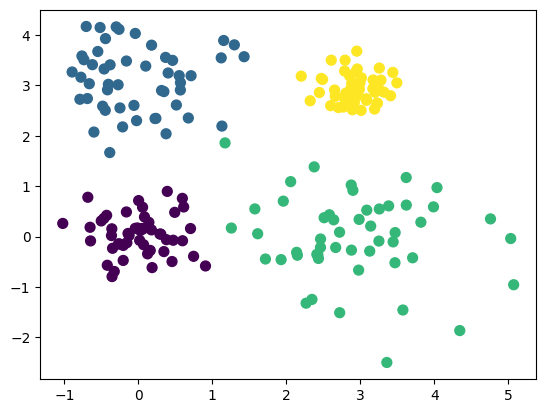

In [4]:
samples = 200
centers = [(0,0),(0,3),(3,0),(3,3)]
stds = [0.4,0.6,0.9,0.3]
X2, y2 = sklearn.datasets.make_blobs(
    n_samples=samples, centers=centers, cluster_std=stds, 
    n_features=2, random_state=0
)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='viridis')
plt.show()

### 3. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_moons``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).

![dataset1](expected_outputs/dataset3.png)

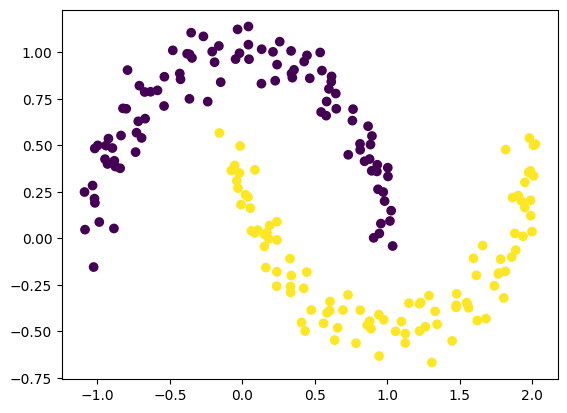

In [5]:
X3, y3 = sklearn.datasets.make_moons(
    n_samples=200, noise=[0.06, 0.087], random_state=0)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis')
plt.show()

### 4. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_circles``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

![dataset1](expected_outputs/dataset4.png)

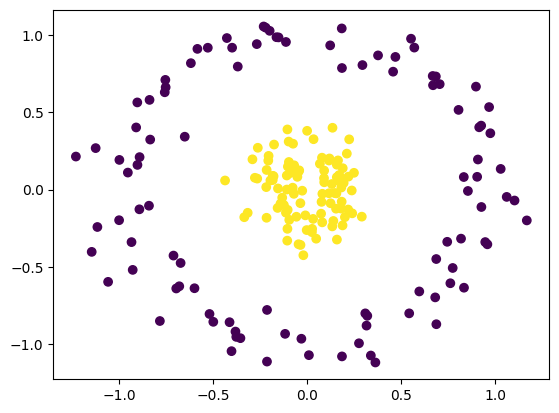

In [6]:
X4, y4 = sklearn.datasets.make_circles(
    n_samples=200, noise=0.1,
    random_state=0, factor=0.2)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='viridis')
plt.show()

## 2. část - K-means

Implementujte K-means algoritmus, aplikujte ho na všechny 4 datasety a zobrazte výsledky algoritmu. Zároveň se pokuste zvýraznit centroid ve vizualizaci výsledku. Pro aplikaci K-means můžete použít počet tříd v každém datasetu (není třeba hledat parametr K automaticky).

In [7]:
import random

In [161]:
def euclidean_dist(v1, v2):
    return np.sqrt(np.sum((v2-v1)**2, axis=0))

def manhattan_dist(v1, v2):
    return np.sum(abs(v2-v1), axis=0)

class KMeans:
    def __init__(self, data, k, metric=manhattan_dist):
        self.metric = metric
        self.data = data
        self.k = k

    def generate_centroids(self):
        return np.array(random.choices(self.data, k = self.k))

    def index_of_nearest_centroid_from(self, point):
        distances = np.zeros(self.centroids.shape[0])
        for index, centroid in enumerate(self.centroids):
            distances[index] = self.metric(point, centroid)
            #print(distances)
        return np.argmin(distances)

    def criterion(self, last):
        print(np.sum(abs(self.metric(self.centroids, last))))
        return np.sum(abs(self.metric(self.centroids, last)))

    def make_clusters(self):
        self.centroids = self.generate_centroids()
        self.clusters = np.zeros(self.data.shape[0])

        # TODO crit func
        last = self.centroids**2
        while self.criterion(last) > 0.1:
            # cluster data
            for index, point in enumerate(self.data):
                self.clusters[index] = self.index_of_nearest_centroid_from(point)

            # update centroids
            last = self.centroids.copy()
            for index, centroid in enumerate(self.centroids):
                indexes = np.argwhere(self.clusters==index)
                points = self.data[indexes,:].squeeze()
                self.centroids[index] = np.mean(points, axis=0)
        return self.clusters


(100, 2)
5.064760719732732
1.3589869968295112
0.27423514798816384
0.0


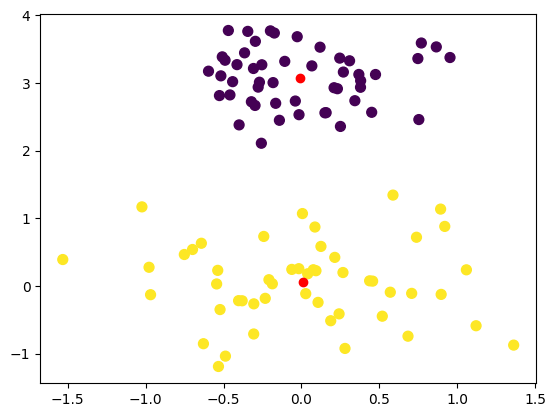

In [172]:
#X4, y4
print(X1.shape)
kmean = KMeans(X1, 2)
clusters = kmean.make_clusters()
centroids = kmean.centroids
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, s=50, cmap='viridis')

plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.show()

## Bonus - K-means s nalezenou hodnotou K

Zkuste najít algoritmy, které umožňují hledat hodnotu K pro K-means. Implementujte alespoň jeden z nich a ověřte, že funguje. Ověření proveďte nejen na našich předchozích datasetech, ale zkuste si vygenerovat i dataset s větším množstvím tříd (10-20). (1 bod)

Za implementaci více algoritmů, případně za hlubší analýzu výsledků (např. kdy už přestává hledání hodnoty K správně fungovat) je možné získat ještě jeden bonusový bod.